In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import yfinance as yfin
import datetime
yfin.pdr_override()

### Housing Data

We have tried to obtain the housing data from zillow. the link to the site is : https://www.zillow.com/research/data/

In [47]:
raw_housing_df=pd.read_csv("./Data/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")
raw_housing_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30
0,102001,0,United States,country,NaN,120020.015498,120231.169181,120493.030838,121054.672692,121701.055130,...,335523.211104,335462.315828,336417.300945,338027.272082,339946.048733,341676.927889,343283.109664,344496.587317,345404.638956,346047.922374
1,394913,1,"New York, NY",msa,NY,214225.979996,215136.319540,216055.090469,217916.875892,219844.819171,...,600197.233963,600509.821697,602499.893236,606494.396332,610627.178896,614197.441106,617467.509260,620170.102296,622496.380878,624788.199586
2,753899,2,"Los Angeles, CA",msa,CA,217855.179140,218665.876819,219745.718395,221894.240387,224244.049881,...,846508.441856,836885.357361,834543.158118,838270.596321,845952.780325,856996.305878,870358.019090,883849.276005,895074.115264,903521.426598
3,394463,3,"Chicago, IL",msa,IL,150007.384914,150146.248054,150410.715349,151068.644257,151860.053595,...,287381.365053,288015.005259,289677.781537,291831.474260,294348.608420,296846.465132,299258.235890,301055.802875,302394.134991,303291.027035
4,394514,4,"Dallas, TX",msa,TX,124041.283443,124096.531864,124160.045580,124324.984028,124542.450856,...,365037.736176,363522.308463,362978.402601,363260.365877,364067.268791,365030.865070,365940.117007,366349.463711,366462.390959,366325.569461


To convert the above data into a timeseries we will have to melt the dataframe.

In [31]:
raw_housing_df.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       '2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30', '2000-05-31',
       ...
       '2023-02-28', '2023-03-31', '2023-04-30', '2023-05-31', '2023-06-30',
       '2023-07-31', '2023-08-31', '2023-09-30', '2023-10-31', '2023-11-30'],
      dtype='object', length=292)

In [34]:
#get the identifier variables and value variables
# id_vars=raw_housing_df.columns[0:5]
id_vars=['RegionID', 'RegionName',]
value_vars=raw_housing_df.columns[5:]
print(id_vars)
print(value_vars)

['RegionID', 'RegionName']
Index(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30', '2000-05-31',
       '2000-06-30', '2000-07-31', '2000-08-31', '2000-09-30', '2000-10-31',
       ...
       '2023-02-28', '2023-03-31', '2023-04-30', '2023-05-31', '2023-06-30',
       '2023-07-31', '2023-08-31', '2023-09-30', '2023-10-31', '2023-11-30'],
      dtype='object', length=287)


In [43]:
housing_df=raw_housing_df[raw_housing_df['RegionID']==102001].melt(id_vars=id_vars,value_vars=value_vars,var_name='Date',value_name='value')

In [44]:
housing_df

,RegionID,RegionName,Date,value
0,102001,United States,2000-01-31,120020.015498
1,102001,United States,2000-02-29,120231.169181
2,102001,United States,2000-03-31,120493.030838
3,102001,United States,2000-04-30,121054.672692
4,102001,United States,2000-05-31,121701.055130
...,...,...,...,...
282,102001,United States,2023-07-31,341676.927889
283,102001,United States,2023-08-31,343283.109664
284,102001,United States,2023-09-30,344496.587317
285,102001,United States,2023-10-31,345404.638956


<Axes: xlabel='Date'>

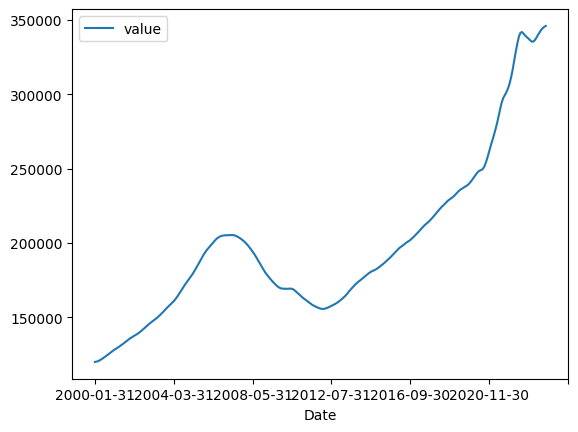

In [58]:
housing_df.set_index("Date")[["value"]].plot()

#### VIX data

In [69]:
#get the bitcoin adjusted closing prices for the last year
start = datetime.date(2000, 1, 31)
end = datetime.date(2023, 11, 30)

vix_df=web.DataReader(["^vix"],start=start,end=end,)["Adj Close"].resample('M').last()

[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date'>

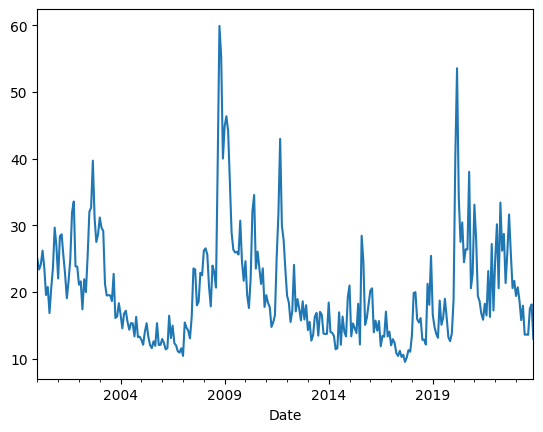

In [71]:
vix_df.plot()